In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [3]:
#retorno == Base_iris
base_iris = load_iris()
display(base_iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
#Organizar os dados 
# GRAFICO: Setosa = 0, Versicolor = 1, Virginica
#Criei uma função onde tranformo o numero correspondente a cada especie, no nome da especie
def nome(target):
    if(target == 0):
        return 'setosa'
    elif(target == 1):
        return 'versicolor'
    elif(target == 2):
        return 'virginica'

In [5]:
#Criando um df com os nomes dos atributos
iris = pd.DataFrame(base_iris.data)
iris.columns = ['comprimento da sépala', 'largura da sépala', 'comprimento da pétala', 'largura da pétala']

In [6]:
#Adicionei as colunas nome e o valor binario correspondente
iris['target'] = base_iris.target #Valor Binario da especie
iris['target_name'] = iris['target'].apply(nome) #Nome da especie
display(iris)

,comprimento da sépala,largura da sépala,comprimento da pétala,largura da pétala,target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


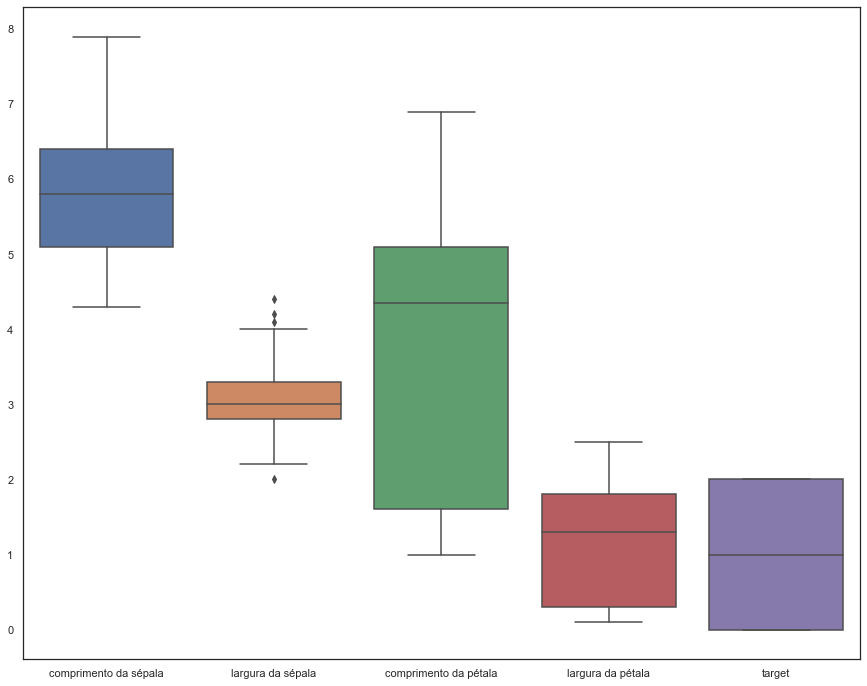

In [7]:
sns.set(rc={'figure.figsize' : (15,12)})
sns.set_theme(style='white')
ax = sns.boxplot(data=iris)
#Eixo Y = Os cm
#Eixo X = Os atributos
#A largura da sepala esta variando menos

In [8]:
#Verificar se a tabela possui valores nulos e os tipos de dados
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   comprimento da sépala  150 non-null    float64
 1   largura da sépala      150 non-null    float64
 2   comprimento da pétala  150 non-null    float64
 3   largura da pétala      150 non-null    float64
 4   target                 150 non-null    int32  
 5   target_name            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [9]:
#Verificar a correlação entre os atributos
#LEGENDA CORRELAÇÃO: 1 : Correlação forte(Uma cresce e a outra Cresce na mesma proporção); - 1: Correlação forte(Quando uma cresce a outra decresce na mesma proporção)
# Correlação: 0 :Correlação fraca(Não tem)
iris.corr()

,comprimento da sépala,largura da sépala,comprimento da pétala,largura da pétala,target
comprimento da sépala,1.000000,-0.117570,0.871754,0.817941,0.782561
largura da sépala,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
comprimento da pétala,0.871754,-0.428440,1.000000,0.962865,0.949035
largura da pétala,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


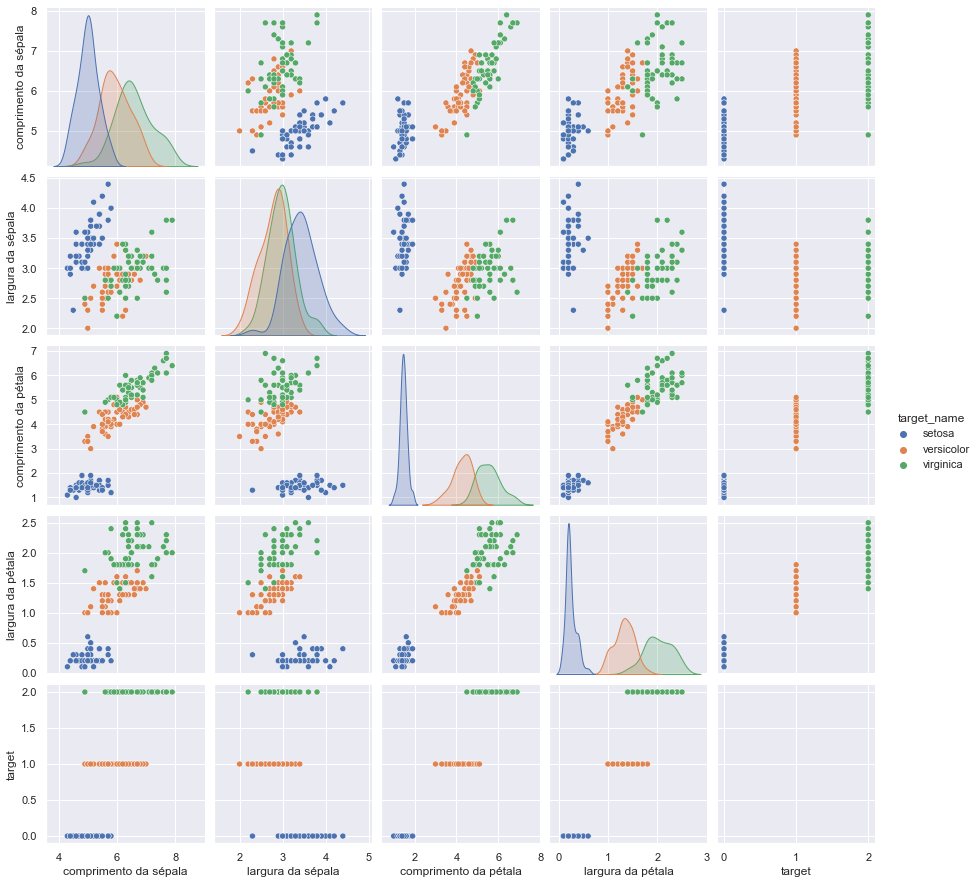

In [35]:
#Verificando as correlações
#Em relação ao comprimento das petalas, conseguimos separar facilmente as Setosas das Virginicas e Versicolor
#Em relação a largura da sépala
sns.set(font_scale = 1)
ax = sns.pairplot(iris, hue='target_name')

In [11]:
#Separando os dados para treino
x_treino, x_teste, y_treino, y_teste = train_test_split(base_iris.data, base_iris.target, random_state=1)#(retorno)

In [12]:
modelo = GaussianNB() #Inicar modelo

In [13]:
#Treinando o modelo
treino = modelo.fit(x_treino, y_treino)

In [14]:
#Ddos de teste
teste = modelo.predict(x_teste)
print(teste)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0]


In [15]:
#Precisão do modelo
print(accuracy_score(y_teste, teste))


0.9736842105263158


### MODELO SVM

In [16]:
#Modelo SVM
x_treino, x_teste, y_treino, y_teste = train_test_split(base_iris.data, base_iris.target, test_size=0.2, random_state=42, stratify=base_iris.target)
modelo_svm = SVC(random_state=1, gamma=0.2, C=1)

In [17]:
modelo.fit(x_treino, y_treino)

GaussianNB()

In [18]:
pred = modelo.predict(x_teste)
print(pred)

[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 2 1 0 2 0]


In [19]:
print(accuracy_score(y_teste, pred))

0.9666666666666667
